In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import sineModel as SM
from smstools.models import harmonicModel as HM
from smstools.transformations import sineTransformations as ST
from smstools.transformations import harmonicTransformations as HT
from smstools.models import utilFunctions as UF

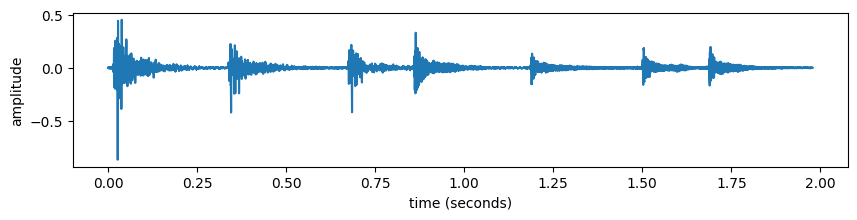

In [2]:
inputFile = "../sounds/mridangam.wav"
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

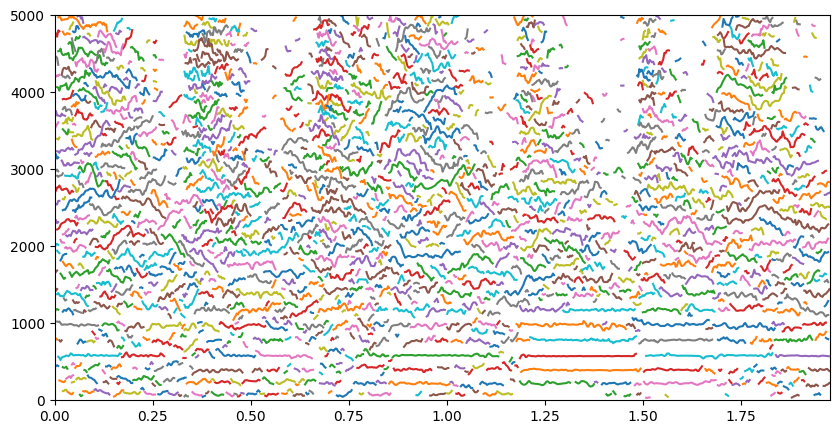

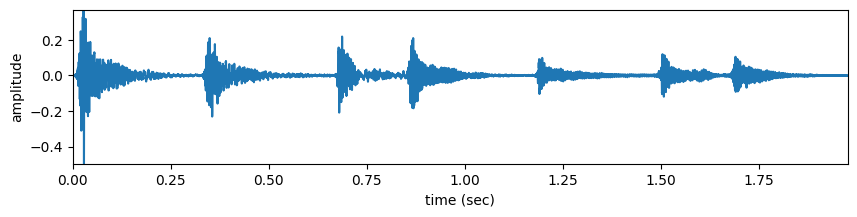

In [5]:
window="hamming"
M=801
N=2048
t=-90
minSineDur=0.01
maxnSines=150
freqDevOffset=20
freqDevSlope=0.02

 # size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128
# compute analysis window
w = get_window(window, M)

# compute the sine model of the whole sound
tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
# synthesize the sines without original phases
y = SM.sineModelSynth(tfreq, tmag, np.array([]), Ns, H, fs)

# create figure to show plots
plt.figure(figsize=(10, 5))
# frequency range to plot
maxplotfreq = 5000.0
tracks = np.copy(tfreq)
tracks = tracks * np.less(tracks, maxplotfreq)
tracks[tracks <= 0] = np.nan
numFrames = int(tracks[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
plt.plot(frmTime, tracks)
plt.axis([0, x.size / float(fs), 0, maxplotfreq])
plt.show()

# plot the output sound
plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))

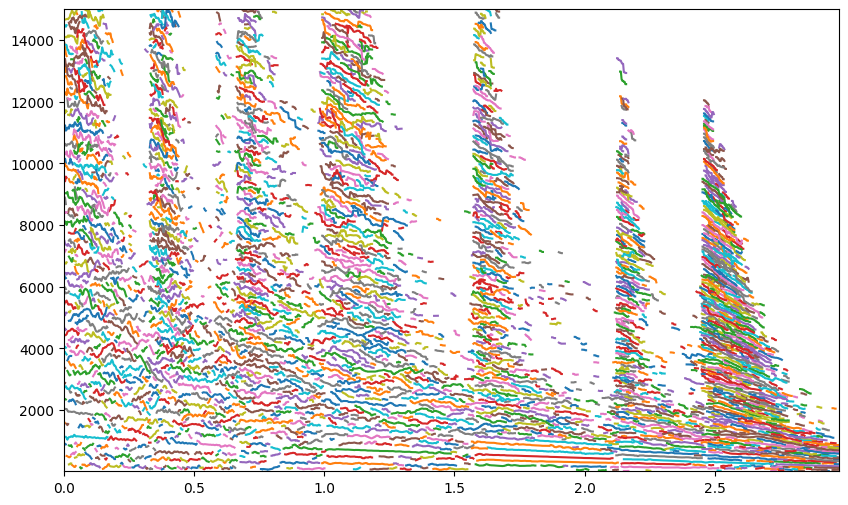

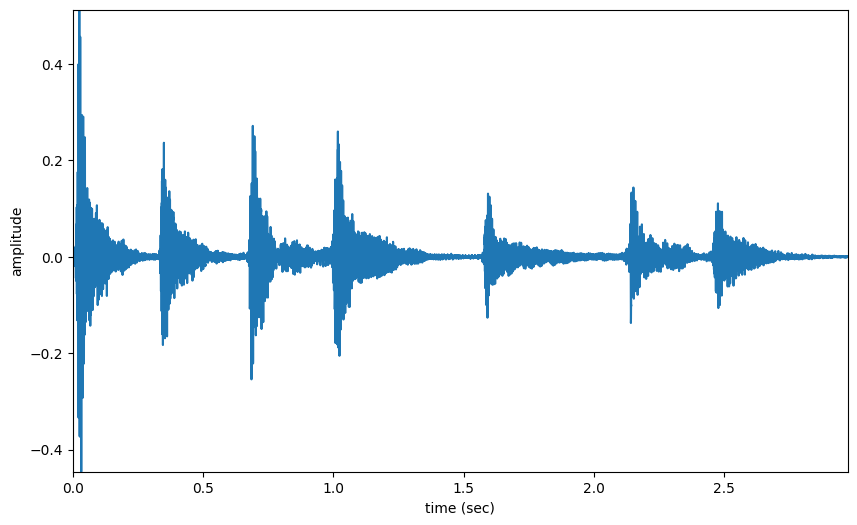

In [6]:
# transformation papameters
freqScaling=np.array([0, 2.0, 1, 0.3])
timeScaling=np.array([0, 0.0, 0.671, 0.671, 1.978, 1.978 + 1.0])

# size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

# frequency scaling of the sinusoidal tracks
ytfreq = ST.sineFreqScaling(tfreq, freqScaling)
# time scale the sinusoidal tracks
ytfreq, ytmag = ST.sineTimeScaling(ytfreq, tmag, timeScaling)
# synthesis
y = SM.sineModelSynth(ytfreq, ytmag, np.array([]), Ns, H, fs)

# create figure to plot
plt.figure(figsize=(10, 6))
# frequency range to plot
maxplotfreq = 15000.0

tracks = np.copy(ytfreq)
tracks = tracks * np.less(tracks, maxplotfreq)
tracks[tracks <= 0] = np.nan
numFrames = int(tracks[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
plt.plot(frmTime, tracks)
plt.autoscale(tight=True)
plt.show()

# plot the output sound
plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))